# COVID-19 Auswertung - new cases, deaths, Intensivstationen
## DIVI und WHO Daten - Deutschland und einige Nachbarn


In [88]:
# import libraries
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots

# performance
from datetime import datetime
from datetime import date # todays date
import seaborn as sns

import os
now = datetime.now()

## Dataframes definieren

In [89]:
# Webabruf - CSV einlesen
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
#gleitender Mittelwert der cases und deaths, 7 Tage
data['MA'] = data['New_cases'].rolling(window=7,min_periods=1).mean()
data['MA_deaths'] = data['New_deaths'].rolling(window=7, min_periods=1).mean()

# Lokal - CSV einlesen
df = pd.read_csv("D:\Github\Covid-19-Auswertung-WHO-DIVI\data-WvhXR.csv")

In [90]:
# Date_reported in eine Datumsspalte umwandeln
data['Date_reported'] = pd.to_datetime(data.Date_reported, utc=True)

df['date'] = pd.to_datetime(df.date, utc=True)

#Timestamp definieren  YYYY-MM-DD
ts = pd.to_datetime('2020-11-01', utc=True)

#dataframe reduzieren 
data = data.loc[data.Date_reported >= ts, :]
df = df.loc[df.date >= ts, :]

In [91]:
# Länder definieren
ger = data[data.Country == 'Germany']
fr = data[data.Country == 'France']
at = data[data.Country == 'Austria']
pl = data[data.Country == 'Poland']
cz = data[data.Country == 'Czechia']
ch = data[data.Country == 'Switzerland']
it = data[data.Country == 'Italy']  # 22.11.2020
es = data[data.Country == 'Spain']  # 22.11.2020
gb = data[data.Country == 'The United Kingdom']  # 22.11.2020
se = data[data.Country == 'Sweden'] # 22.11.2020

## Variablen für die Plots definieren

In [92]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 28

In [93]:
# Einwohnerzahlen
E_fr = 66012908
E_pl = 38659927
E_ger = 81504947
E_cz = 10586651
E_at = 8902600
E_ch = 8847020
E_gb = 66650000

In [94]:
# Bezugsgröße Einwohner
pE = 100000

# Heutiges Datum und formatieren dd.mm.YYYY
today = date.today().strftime("%d.%m.%Y")

## Visualisierung Plots
### Todesfälle 7 Tage Mittelwert 

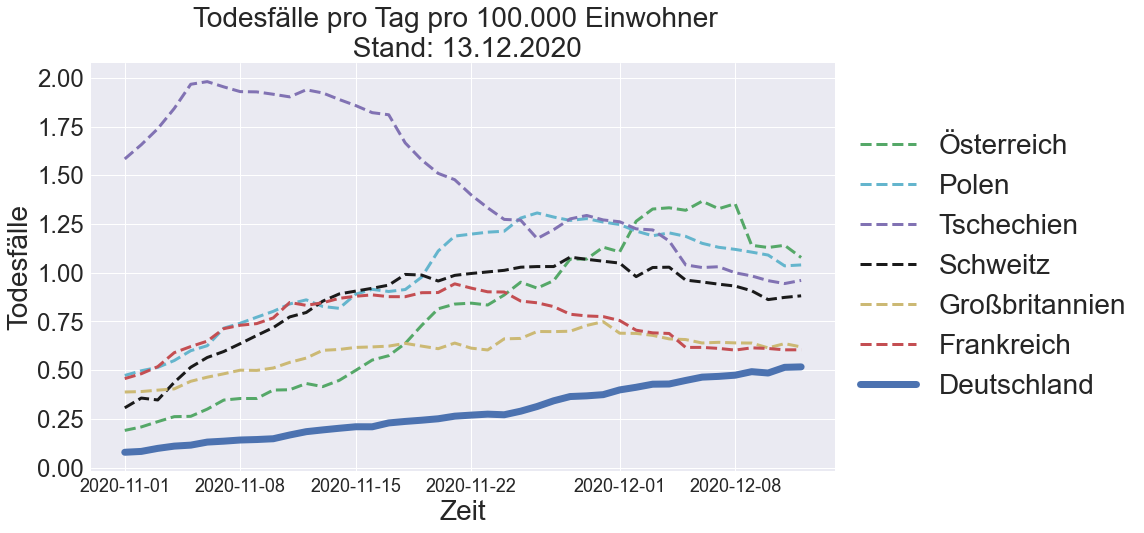

In [95]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.2,9/1.2))

plt.style.use('seaborn')
plt.grid(True)

# Todesfälle pro 100.000 Einwohner 02.12.2020

plt.plot(at.Date_reported,at['MA_deaths'] * (pE/E_at), 'g--', linewidth = lws) # grün, gestrichelt, dünn
plt.plot(pl.Date_reported,pl['MA_deaths'] * (pE/E_pl), 'c--', linewidth = lws) # cyan, gestrichelt, dünn
plt.plot(cz.Date_reported,cz['MA_deaths'] * (pE/E_cz), 'm--', linewidth = lws) # magenta, gestrichelt, dünn
plt.plot(ch.Date_reported,ch['MA_deaths'] * (pE/E_ch), 'k--', linewidth = lws) # schwarz, gestrichelt, dünn
plt.plot(gb.Date_reported,gb['MA_deaths'] * (pE/E_gb), 'y--', linewidth = lws) # gelb, gestrichelt, dünn
plt.plot(fr.Date_reported,fr['MA_deaths'] * (pE/E_fr), 'r--', linewidth = lws) # rot, gestrichelt, dünn
plt.plot(ger.Date_reported,ger['MA_deaths'] * (pE/E_ger), 'b-', linewidth = lwb) # blau, linie, dick

# Legende 
plt.legend(['Österreich', 'Polen', 'Tschechien','Schweitz', 'Großbritannien', 'Frankreich',  'Deutschland'],
           loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10)
plt.yticks(fontsize=size -4)
plt.ylabel('Todesfälle', fontsize=size)
plt.title('Todesfälle pro Tag pro 100.000 Einwohner  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_deaths.jpg', dpi = 150, bbox_inches='tight')

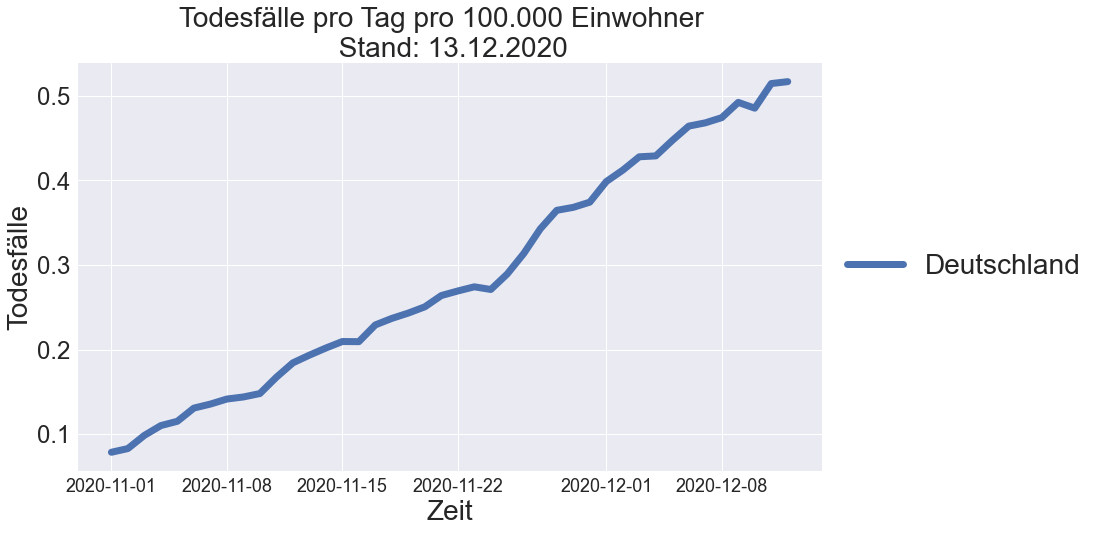

In [96]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.2,9/1.2))

plt.style.use('seaborn')
plt.grid(True)

# Todesfälle pro 100.000 Einwohner 02.12.2020

plt.plot(ger.Date_reported,ger['MA_deaths'] * (pE/E_ger), 'b-', linewidth = lwb) # blau, linie, dick

# Legende 
plt.legend(['Deutschland'],
           loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10)
plt.yticks(fontsize=size -4)
plt.ylabel('Todesfälle', fontsize=size)
plt.title('Todesfälle pro Tag pro 100.000 Einwohner  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_deaths_ger.jpg', dpi = 150, bbox_inches='tight')

### Neue Fälle 7 Tage Mittelwert 

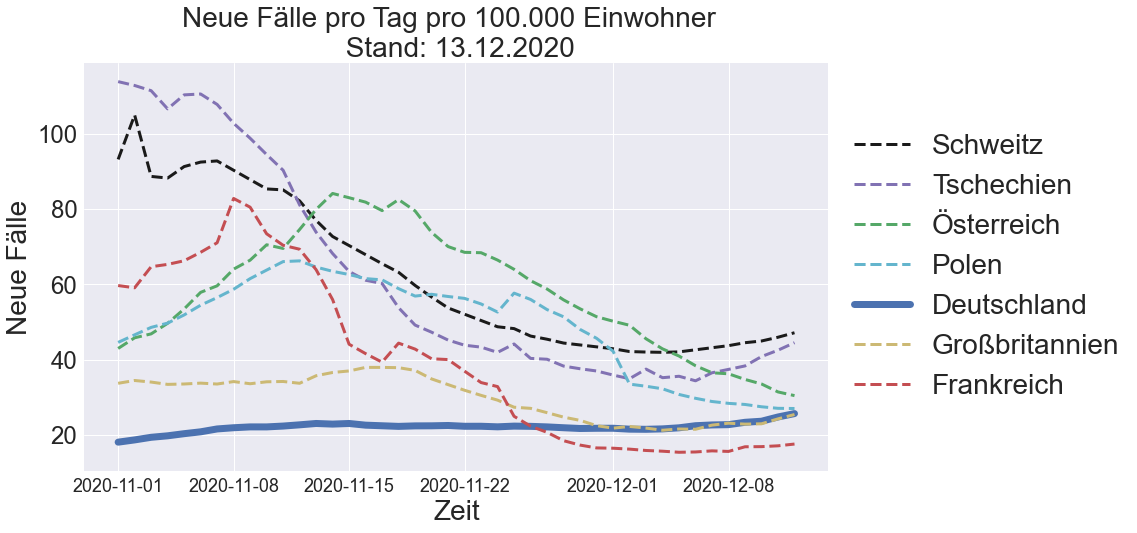

In [97]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.2,9/1.2))


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 
plt.plot(ch.Date_reported,ch['MA']* (pE/E_ch), 'k--', linewidth = lws)
plt.plot(cz.Date_reported,cz['MA']* (pE/E_cz), 'm--', linewidth = lws)
plt.plot(at.Date_reported,at['MA']* (pE/E_at), 'g--', linewidth = lws)
plt.plot(pl.Date_reported,pl['MA']* (pE/E_pl), 'c--', linewidth = lws)
plt.plot(ger.Date_reported,ger['MA']* (pE/E_ger), 'b-', linewidth = lwb)
plt.plot(gb.Date_reported,gb['MA']* (pE/E_gb), 'y--', linewidth = lws)
plt.plot(fr.Date_reported,fr['MA']* (pE/E_fr), 'r--', linewidth = lws)

plt.legend(['Schweitz', 'Tschechien', 'Österreich', 'Polen', 'Deutschland', 'Großbritannien' , 'Frankreich'],
           loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)


# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.title('Neue Fälle pro Tag pro 100.000 Einwohner  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_cases.jpg', dpi = 150, bbox_inches='tight')

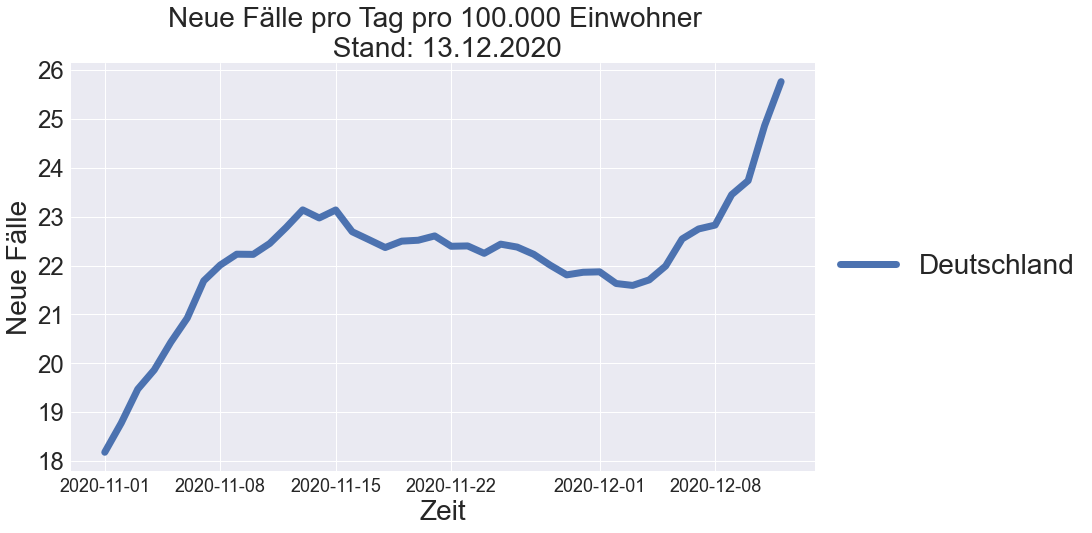

In [98]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.2,9/1.2))


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 
plt.plot(ger.Date_reported,ger['MA']* (pE/E_ger), 'b-', linewidth = lwb)

plt.legend(['Deutschland'],
           loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.title('Neue Fälle pro Tag pro 100.000 Einwohner  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_cases_ger.jpg', dpi = 150, bbox_inches='tight')

### Intensivstationen DIVI

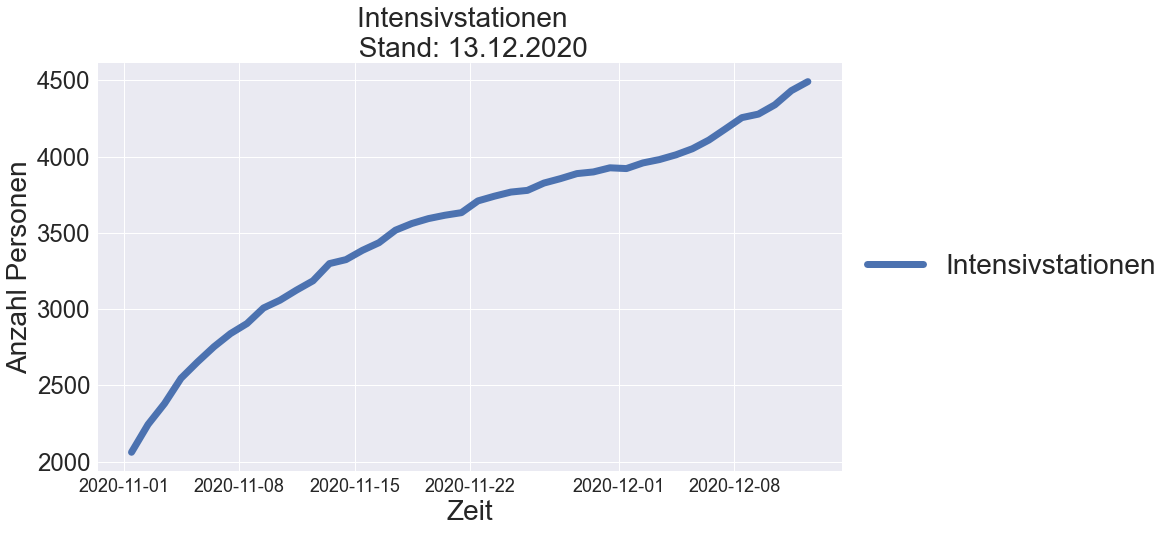

In [99]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.2,9/1.2))

plt.style.use('seaborn')
plt.grid(True)
plt.plot(df.date,df['COVID-19-Fälle'], 'b-', linewidth = lwb)
plt.legend(["Intensivstationen"],
           loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10)
plt.yticks(fontsize=size -4)

# plt.xticks([])
plt.ylabel('Anzahl Personen', fontsize=size)
plt.title('Intensivstationen  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig('D:\Github\Covid-19-Auswertung-WHO-DIVI\plot_intensiv.jpg', dpi = 150, bbox_inches='tight')

## Performance messen

In [100]:
#performance
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()
print(f'performance {pc} = {now2-now} seconds')

performance DOUG = 0:00:02.898372 seconds


In [101]:
# Performance
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

x = now2 - now
x = round(x.total_seconds(),2)

print(f'performance {pc} = {x} seconds')

performance DOUG = 2.92 seconds


In [102]:
# Performance CSV einlesen
d = pd.read_csv('df_performance.csv')

In [103]:
# Neues Dateframe für die Performance definieren
now = datetime.now()

d2 = {'Date': [now],
      'PC': [pc],
      'Laufzeit_in_s': [x]}
#d2

In [104]:
# Datum Spalte formatieren
df2 = pd.DataFrame(d2)
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d %r')

In [105]:
# Performance mit dem CSV verbinden
d = d.append(df2, ignore_index=True)
d.head(3)

,Date,PC,Laufzeit_in_s
0,2020-12-13 01:16:17 AM,DOUG,2.16
1,2020-12-13 01:16:41 AM,DOUG,2.02
2,2020-12-13 01:17:12 AM,DOUG,3.18


In [106]:
# Datenexport Performance
d.to_csv(r'D:\Github\Covid-19-Auswertung-WHO-DIVI\df_performance.csv', index=False)

Text(0.5, 0, 'Laufzeit [s]')

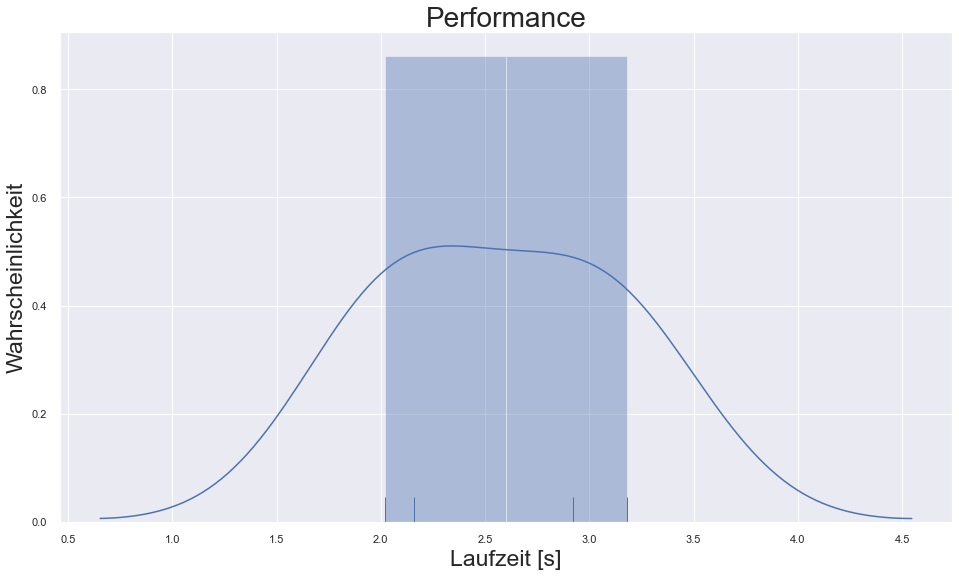

In [107]:
# Plot Performance
sns.set(rc={'figure.figsize':(16,9)})
sns_plot = sns.distplot(d['Laufzeit_in_s'],
            kde=True,
            rug=True,
            )
sns_plot.set_title('Performance',size=size)
sns_plot.set_ylabel('Wahrscheinlichkeit', size = size -5)
sns_plot.set_xlabel('Laufzeit [s]', size = size -5)

In [108]:
# Plot Performance rausschreiben
fig = sns_plot.get_figure()
fig.savefig("performance_dist.jpg") 